<a href="https://colab.research.google.com/github/Radhika-ag11/Radhika-ag11/blob/main/Recession_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv("UK_monthly_gdp.csv")
df

,Time Period,GDP Growth
0,/01/2020,0.3
1,/02/2020,-0.5
2,/03/2020,-7.0
3,/04/2020,-20.9
4,/05/2020,3.2
5,/06/2020,9.0
6,/07/2020,7.4
7,/08/2020,2.0
8,/09/2020,1.1
9,/10/2020,0.6


In [10]:
df_2020=df.iloc[:12]
df_2020['Time Period']= pd.to_datetime(df_2020['Time Period'], format='/%m/%Y')
df_2020

<ipython-input-10-cd866ef2e225>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2020['Time Period']= pd.to_datetime(df_2020['Time Period'], format='/%m/%Y')


,Time Period,GDP Growth
0,2020-01-01,0.3
1,2020-02-01,-0.5
2,2020-03-01,-7.0
3,2020-04-01,-20.9
4,2020-05-01,3.2
5,2020-06-01,9.0
6,2020-07-01,7.4
7,2020-08-01,2.0
8,2020-09-01,1.1
9,2020-10-01,0.6


In [11]:
import matplotlib.pyplot as plt


In [12]:
import seaborn as sns

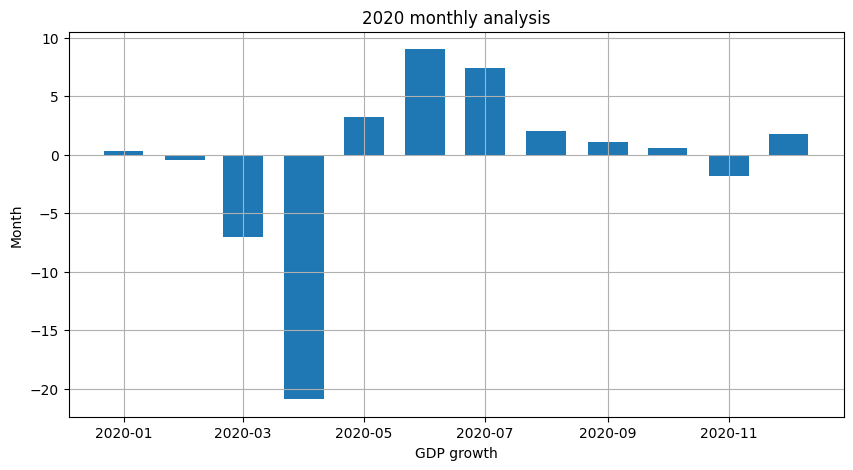

In [13]:
fig=plt.figure(figsize=(10,5))
#ax=plt.subplots()
plt.bar(df_2020['Time Period'],df_2020['GDP Growth'], width=20)
plt.xlabel('GDP growth')
plt.ylabel('Month')
plt.title('2020 monthly analysis')
plt.grid()
plt.show()

In [14]:
df_2021=df.iloc[12:24]
df_2021['Time Period']= pd.to_datetime(df_2021['Time Period'], format='/%m/%Y')
df_2021

<ipython-input-14-43259a79c2e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['Time Period']= pd.to_datetime(df_2021['Time Period'], format='/%m/%Y')


,Time Period,GDP Growth
12,2021-01-01,-2.9
13,2021-02-01,0.7
14,2021-03-01,2.3
15,2021-04-01,3.1
16,2021-05-01,1.3
17,2021-06-01,1.0
18,2021-07-01,-0.2
19,2021-08-01,0.9
20,2021-09-01,0.6
21,2021-10-01,0.1


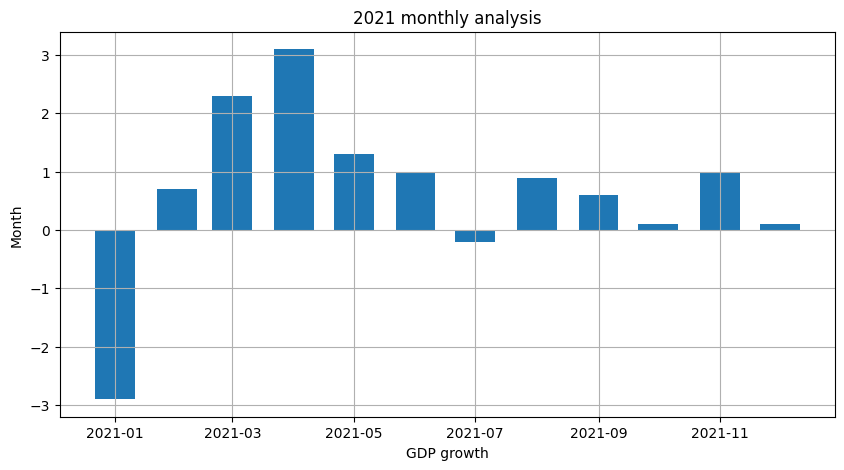

In [15]:
fig=plt.figure(figsize=(10,5))
#ax=plt.subplots()
plt.bar(df_2021['Time Period'],df_2021['GDP Growth'], width=20)
plt.xlabel('GDP growth')
plt.ylabel('Month')
plt.title('2021 monthly analysis')
plt.grid()
plt.show()

<ipython-input-16-61cbb59be30d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Time Period']= pd.to_datetime(df_2022['Time Period'], format='/%m/%Y')


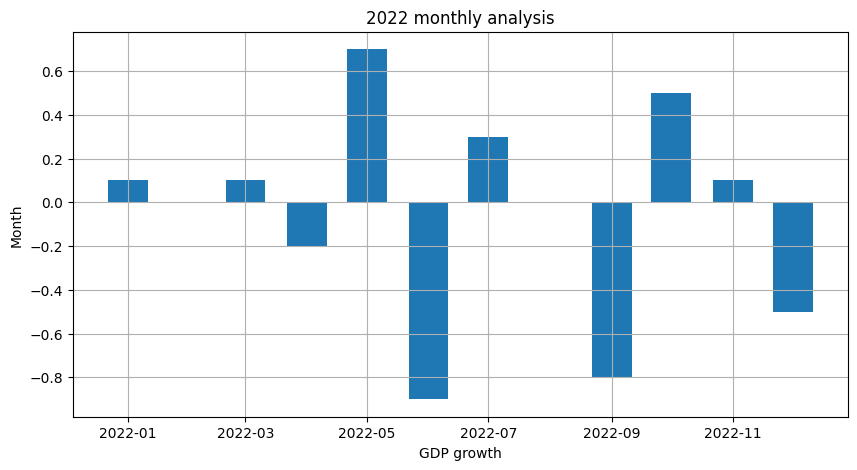

In [16]:
df_2022=df.iloc[24:36]
df_2022['Time Period']= pd.to_datetime(df_2022['Time Period'], format='/%m/%Y')
df_2022

fig=plt.figure(figsize=(10,5))
#ax=plt.subplots()
plt.bar(df_2022['Time Period'],df_2022['GDP Growth'], width=20)
plt.xlabel('GDP growth')
plt.ylabel('Month')
plt.title('2022 monthly analysis')
plt.grid()
plt.show()

In [18]:
df['Time Period'] = pd.to_datetime(df['Time Period'], format='/%m/%Y')
df.set_index('Time Period', inplace=True)
quarterly_data = df.resample('Q').mean()
print(quarterly_data.head())

             GDP Growth
Time Period            
2020-03-31    -2.400000
2020-06-30    -2.900000
2020-09-30     3.500000
2020-12-31     0.200000
2021-03-31     0.033333


In [20]:
quarterly_data['Recession'] = ((quarterly_data['GDP Growth'] < 0) & (quarterly_data['GDP Growth'].shift(1) < 0))

# Fill missing values with False (since the first quarter cannot be in a recession)
quarterly_data['Recession'].fillna(False, inplace=True)

# Plot the GDP growth and recession data
import plotly.graph_objs as go
import plotly.express as px
fig = go.Figure()
fig.add_trace(go.Scatter(x=quarterly_data.index,
                         y=quarterly_data['GDP Growth'],
                         name='GDP Growth',
                         line=dict(color='green', width=2)))
fig.add_trace(go.Scatter(x=quarterly_data[quarterly_data['Recession']].index,
                         y=quarterly_data[quarterly_data['Recession']]['GDP Growth'],
                         name='Recession', line=dict(color='red', width=2)))

fig.update_layout(title='GDP Growth and Recession over Time (Quarterly Data)',
                  xaxis_title='Time Period',
                  yaxis_title='GDP Growth')

fig.show()

In [21]:
quarterly_data['Recession Start'] = quarterly_data['Recession'].ne(quarterly_data['Recession'].shift()).cumsum()
recession_periods = quarterly_data.groupby('Recession Start')
recession_duration = recession_periods.size()
recession_severity = recession_periods['GDP Growth'].sum()

fig = go.Figure()
fig.add_trace(go.Bar(x=recession_duration.index, y=recession_duration,
                     name='Recession Duration'))
fig.add_trace(go.Bar(x=recession_severity.index, y=recession_severity,
                     name='Recession Severity'))

fig.update_layout(title='Duration and Severity of Recession',
                  xaxis_title='Recession Periods',
                  yaxis_title='Duration/Severity')

fig.show()